## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
68548,74348,B09KVDRD37,Akozon 26Pin OBD2 Diagnostic Cable Connector H...,4.8,6,16.24,False,0,Car & Motorbike
1745738,1967205,B086C7XQJM,"HD PC Webcam,USB Computer Web Camera Video Cam...",0.0,0,9.99,False,0,Computer Audio & Video Accessories
312252,330886,B0BJVQLM64,"AOCWEI Laptop Computers Win 10, 14"" 6GB RAM 12...",4.5,70,229.49,False,0,Laptops
2236967,2584546,B086T74V42,"Instax Mini 11 Camera Accessory Kit, Lilac Purple",4.7,7056,20.40,False,0,Film Cameras
16959,18351,B074XFPF4N,Deshumidificador Cube 1000G Gris,4.2,3308,21.82,False,0,"Heating, Cooling & Air Quality"


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [4]:
crosstab_res=pd.crosstab(df['category'],
            df['isbestseller'],margins=True)
crosstab_res

isbestseller,False,True,All
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Window Treatments,234,5,239
Women,17559,213,17772
Women's Sports & Outdoor Shoes,1939,20,1959


In [5]:
crosstab_res["prop_total"]=round(crosstab_res[True]/crosstab_res["All"]*100,2)
crosstab_res.head()

isbestseller,False,True,All,prop_total
category,,,,
3D Printers,247,1,248,0.40
3D Printing & Scanning,4065,2,4067,0.05
Abrasive & Finishing Products,245,5,250,2.00
Action Cameras,1696,1,1697,0.06
Adapters,251,3,254,1.18


In [6]:
crosstab_res_prop_total=crosstab_res.sort_values(by='prop_total',ascending=False)


We can clearly see that "grocery" has the most best selling proportion among its products, followed by Smart Home products.



2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [7]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_res)
chi2_pvalue

0.0

In [8]:
df.isbestseller.value_counts()

isbestseller
False    2435671
True        7980
Name: count, dtype: int64

Due to the fact that, among the two and a half million "False" values, there are only 8,000 "True" values, these would have had to be distributed among more than 200 types of categories (8000/200) in order to claim that the variables are completely independent. Since this is clearly not the case, the chi-square test (p-value = 0.00) shows that the two variables are related. "Grocery," "Health," and "Power" products alone account for almost 2,000 of the 8,000 "True" values. 

In [9]:
crosstab_res=pd.crosstab(df['category'],
            df['isbestseller'])
crosstab_res=crosstab_res ## Quitamos (margins=True) porque si no no me dejaba hacer el plot 

In [10]:
crosstab_res=pd.crosstab(df['category'],
            df['isbestseller'])
crosstab_res ## Quitamos (margins=True) porque si no no me dejaba hacer el Cramer (no sé por qué)

isbestseller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [11]:
association(crosstab_res, method='cramer')

0.1222829439760564

Debido a que Cramer V va de 0 (independiente) a 1(dependiente) podemos deducir que hay una asociación débil entre ambas variables. Chi Cuadrado nos ha afirmado con un 100% de confianza que hay dependencia entre variables, pero Cramer nos dice que esa asociación es bastante débil. 


3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.



In [12]:
#Filtramos la columna de contingencia para que solo aparezcan las 15 primeras columnas con más porcentaje de True.
crosstab_res_prop_total=crosstab_res_prop_total.head(15) 

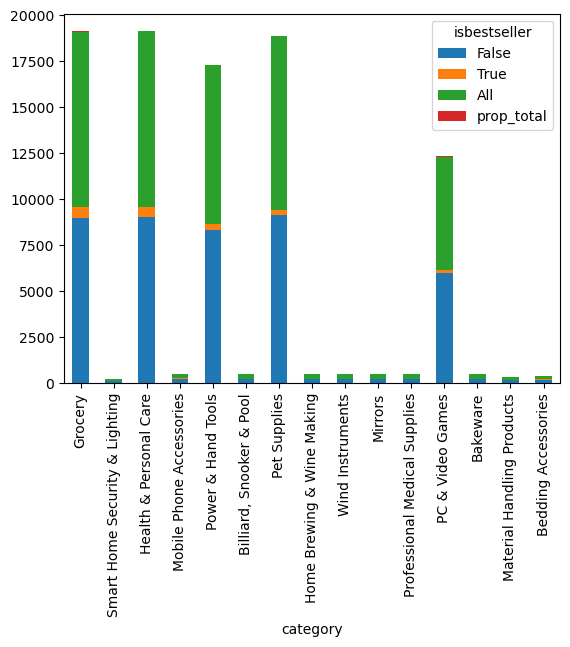

In [13]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_res_prop_total.plot(kind='bar', stacked=True)
plt.show() ## El stack verde "All"  no tendría sentido y convendría eliminarla previamente de la columna de contingencia



---
## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


/tmp/ipykernel_55182/2073667185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="price", palette="coolwarm")


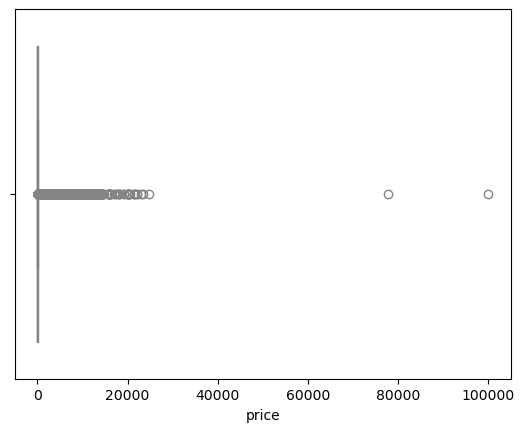

In [14]:
sns.boxplot(data=df, x="price", palette="coolwarm")
plt.show()

In [40]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [90]:
outliers=tukeys_test_outliers(df.price).index
outliers

Index([     10,      19,      25,      28,      31,      33,      34,      35,
            36,      37,
       ...
       2443590, 2443591, 2443603, 2443613, 2443614, 2443619, 2443627, 2443638,
       2443641, 2443643],
      dtype='int64', length=327688)

In [42]:
df2=df.copy()
df2=df2.drop(index=outliers)


In [43]:

df2.shape

(2115963, 9)

In [44]:
tukeys_test_outliers(df2.price)

14         64.99
22         64.99
23         98.95
27         79.99
38         74.99
           ...  
2443625    99.95
2443626    71.95
2443628    69.99
2443647    97.99
2443649    79.99
Name: price, Length: 157052, dtype: float64

/tmp/ipykernel_55182/2190265899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x="price", palette="coolwarm")


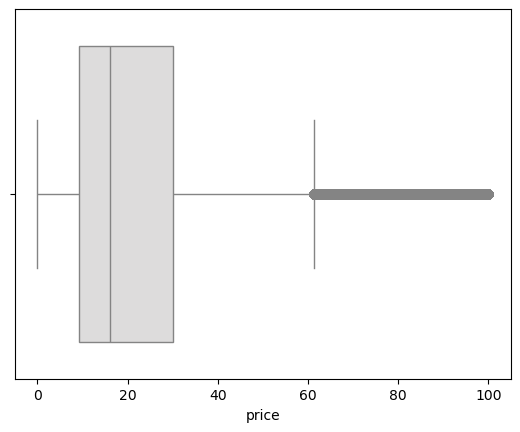

In [45]:
sns.boxplot(data=df2, x="price", palette="coolwarm")
plt.show() ## Ahora ya se ve al menos la "caja" del boxplot


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.
    


In [46]:
top_20_categories=df2.category.value_counts().sort_values(ascending=False).head(20).index ## Importante hacer el index!!
violin_plot_df = df2[df2['category'].isin(top_20_categories)]
violin_plot_df.head(10)


,uid,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
19518,21077,B0BN6NTWYX,Ceramic Thank You Keepsake Gift Sentimental Gi...,5.0,11,7.99,True,300,Handmade Home & Kitchen Products
19519,21078,B0BRVSX2TR,Baby shower baby book | wishes for baby guestb...,4.1,24,12.99,True,300,Handmade Home & Kitchen Products
19520,21079,B07P914HBH,Gloss Colours Small to Large Sizes 100 Fonts C...,4.6,867,3.75,True,200,Handmade Home & Kitchen Products
19521,21080,B08Y826JH4,"Personalised birthday gift ""ON THE DAY/YEAR YO...",4.6,767,8.75,False,200,Handmade Home & Kitchen Products
19522,21081,B0BSTK3H2Y,Handmade Scented Hoover Discs - Elevate Your V...,4.4,35,6.95,False,200,Handmade Home & Kitchen Products


/tmp/ipykernel_55182/678495149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_plot_df,x="category",y="price",palette="coolwarm")


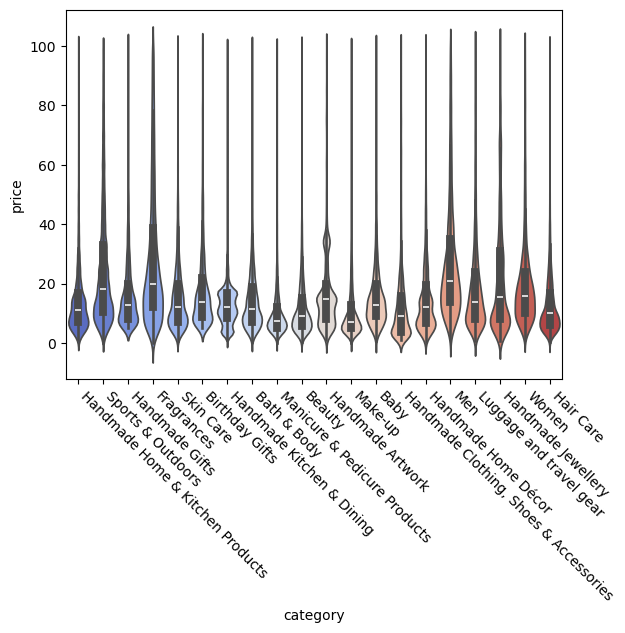

In [47]:
sns.violinplot(data=violin_plot_df,x="category",y="price",palette="coolwarm")
plt.xticks(rotation=-45,ha="left")
plt.show()

Either "men" and "fragrances" are the 2 categories with the highest median rates of the 20 top categories. 

In [52]:
df2.groupby("category")["price"].agg("median").sort_values(ascending=False).head(1)

category
Desktop PCs    74.0
Name: price, dtype: float64

Without filtering for the top categories, Laptops has the highest median regarding "price".


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


In [57]:
top_10_categories=df2.category.value_counts().sort_values(ascending=False).head(10).index
df_top_10_categories=df2[df2.category.isin(top_10_categories)]

/tmp/ipykernel_55182/363012506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_categories, x="category", y="price", palette="coolwarm") ## El estimator


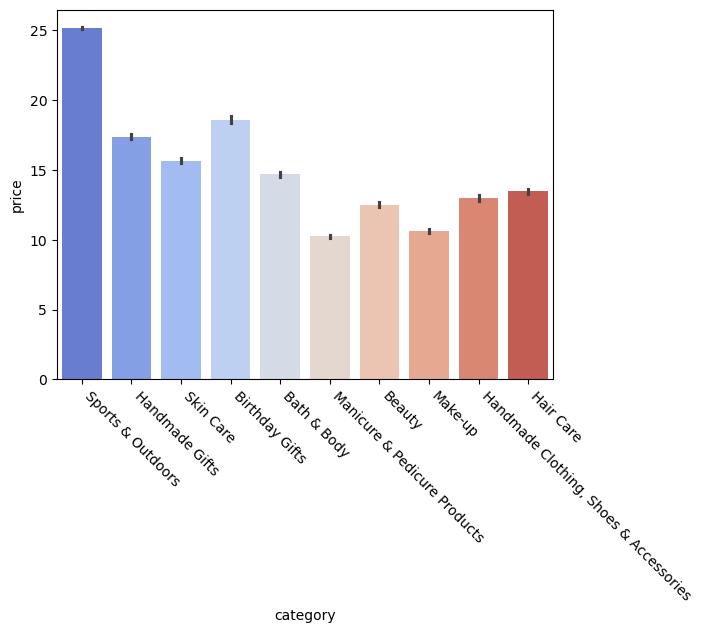

In [58]:
sns.barplot(data=df_top_10_categories, x="category", y="price", palette="coolwarm") ## El estimator 
plt.xticks(rotation=-45,ha="left")
plt.show()
plt.show()

In [59]:
df2.groupby("category")["price"].agg("mean").sort_values(ascending=False).head(1)

category
Motherboards    68.772432
Name: price, dtype: float64

It indicates the category with highest average price is Motherboards.


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


/tmp/ipykernel_55182/4121453812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10_categories, x="category", y="stars", palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

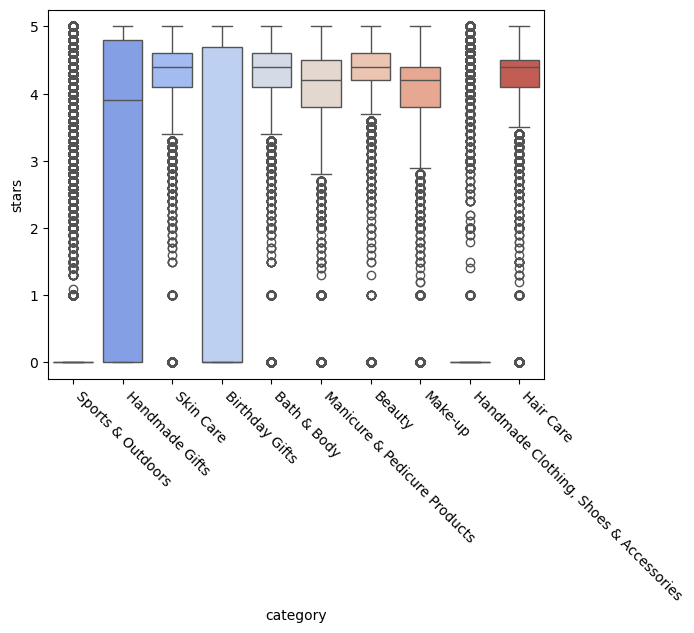

In [63]:
sns.boxplot(data=df_top_10_categories, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=-45,ha="left")


In [62]:
df2.groupby("category")["stars"].agg("median").sort_values(ascending=False).head(1)

category
Computer Memory    4.7
Name: stars, dtype: float64


---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
    


In [97]:
df2['price'].corr(df2['stars'])

-0.07767299878178476

Due to Pearsons, we can say there is no clear correlations between "price" and rating (stars).

In [98]:
df2['price'].corr(df2['stars'], method='spearman')

-0.06679697280756669

Due to Spearman, we can say there is no clear correlations between "price" and rating (stars).

	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


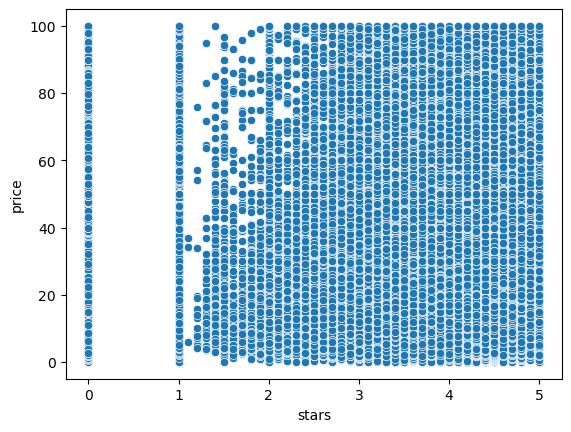

In [71]:
sns.scatterplot(data=df2, x="stars", y='price')
plt.show()

In [74]:
df2num=df2.select_dtypes(include="number")

In [76]:
correlation_matrix = df2num.corr()

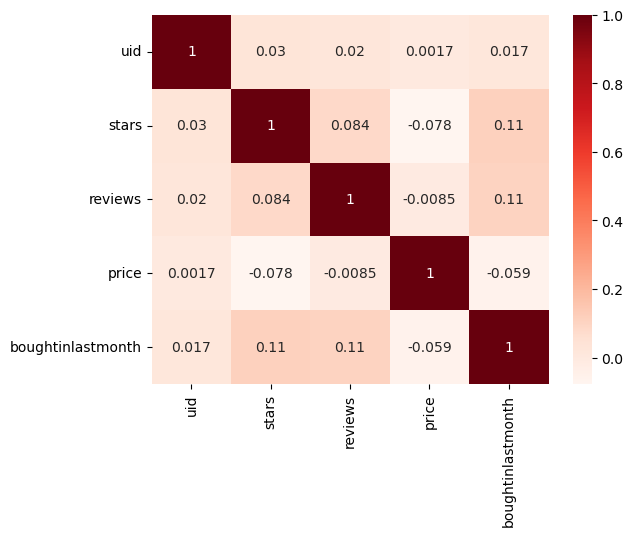

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap="Reds")
plt.show()

We cannot observe any correlation between any of the numeric variables.

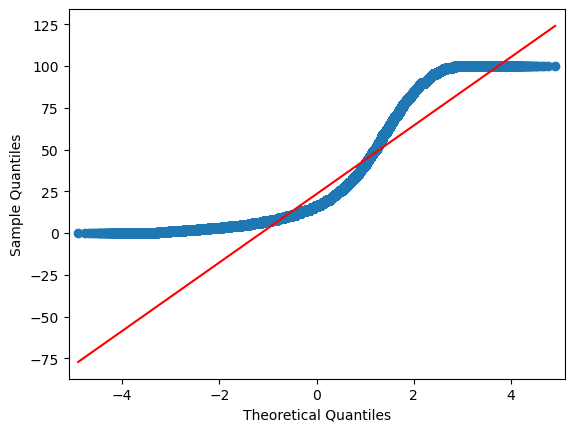

In [88]:
import statsmodels.api as sm
sm.qqplot(df2['price'], line='s');
plt.show()

We see there is no normal distribution without the outliers. 


---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.
    


/tmp/ipykernel_55182/2105791410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_plot_df,x="category",y="price",palette="coolwarm")


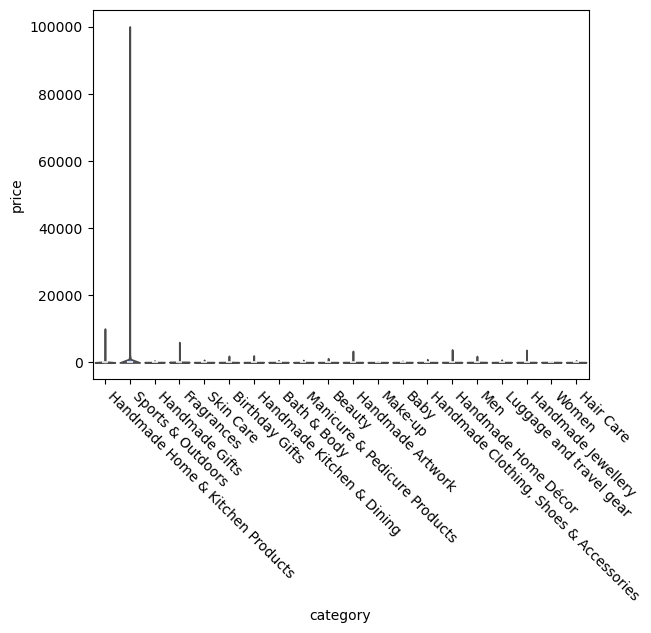

In [91]:
top_20_categories=df.category.value_counts().sort_values(ascending=False).head(20).index ## Importante hacer el index!!
violin_plot_df = df[df['category'].isin(top_20_categories)]
violin_plot_df.head(10)

sns.violinplot(data=violin_plot_df,x="category",y="price",palette="coolwarm")
plt.xticks(rotation=-45,ha="left")
plt.show()

Just as will likely happen with the rest of the graphs related to price, we will observe that the graphs have poor resolution since the outliers will mask the bulk of the distribution of values.

In [92]:
df.groupby("category")["price"].agg("median").sort_values(ascending=False).head(1)

category
Laptops    1042.725
Name: price, dtype: float64

With the outliers included, we can see that the median price of laptops has increased. Nevertheless, it remains the top category in terms of price.


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


In [93]:
top_10_categories=df.category.value_counts().sort_values(ascending=False).head(10).index
df_top_10_categories=df[df.category.isin(top_10_categories)]

/tmp/ipykernel_55182/363012506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_categories, x="category", y="price", palette="coolwarm") ## El estimator


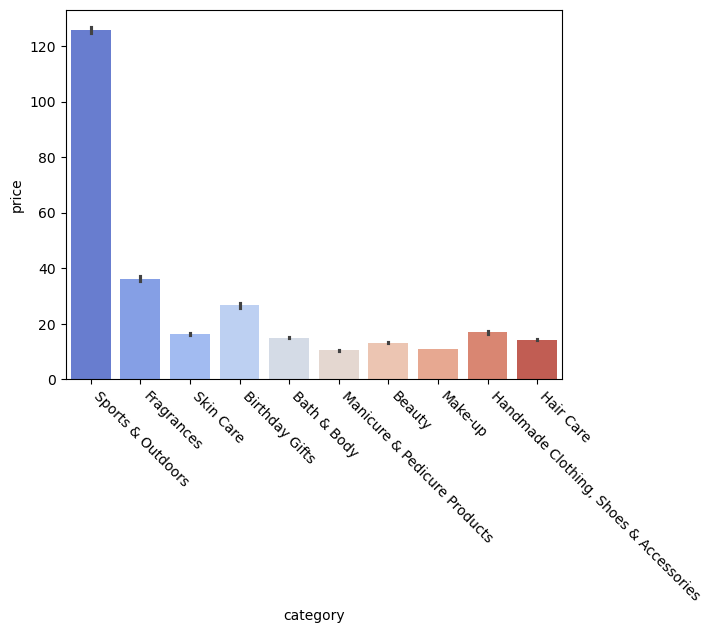

In [94]:
sns.barplot(data=df_top_10_categories, x="category", y="price", palette="coolwarm") ## El estimator 
plt.xticks(rotation=-45,ha="left")
plt.show()
plt.show()

With the outliers, we can see how Sports & Outdoors gets distanced of the rest.


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


/tmp/ipykernel_55182/4121453812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10_categories, x="category", y="stars", palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

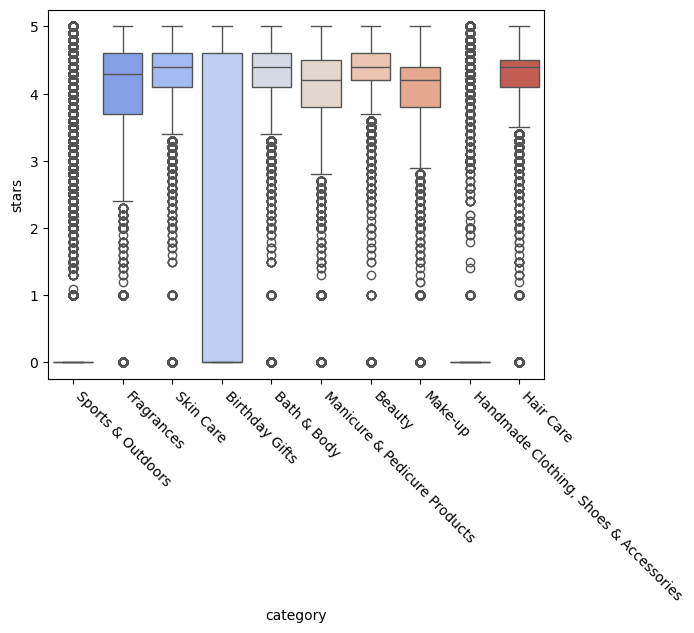

In [95]:
sns.boxplot(data=df_top_10_categories, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=-45,ha="left")


In [96]:
df.groupby("category")["stars"].agg("median").sort_values(ascending=False).head(1)

category
Computer Memory    4.7
Name: stars, dtype: float64


---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
    


In [ ]:
df['price'].corr(df['stars'])

-0.12490673262159059

We see how the correlation get increased with the outliers. But it is still very low. 

In [ ]:
df['price'].corr(df['stars'], method='spearman')

-0.13316425462401277

The same happens with the Spearman method, which increased from -0.06 to -0.13 (in absolute value), still remaining very low.

	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


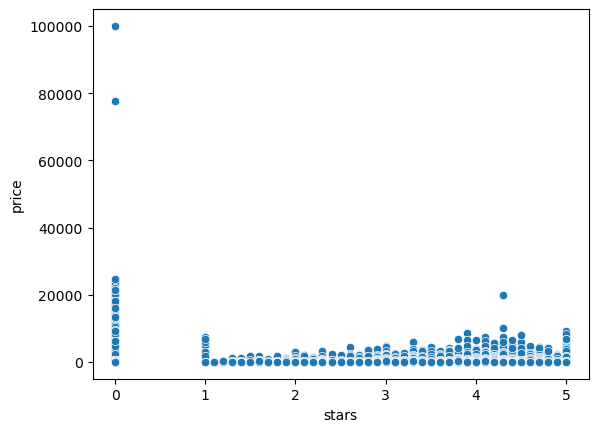

In [99]:
sns.scatterplot(data=df, x="stars", y='price')
plt.show()

With the outliers, we can see how the vast majority of the values are concentrated in the lower part of the plot.

In [100]:
dfnum=df.select_dtypes(include="number")

In [101]:
correlation_matrix = dfnum.corr()

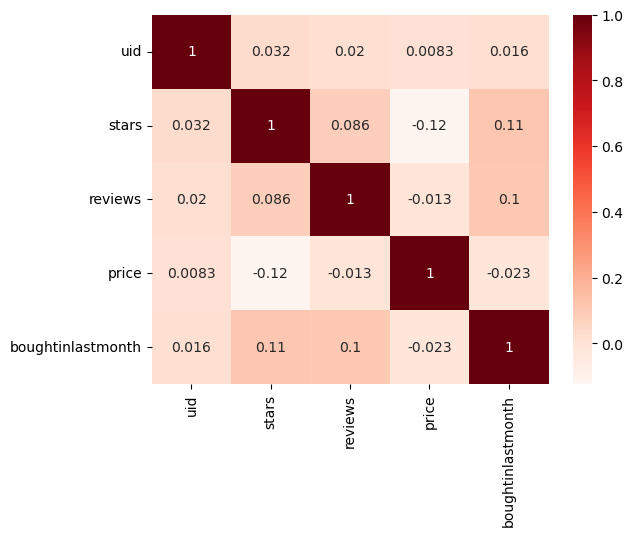

In [102]:
sns.heatmap(correlation_matrix, annot=True, cmap="Reds")
plt.show()

No differences are made with the outliers concerning the correlation among the numeric variables. 

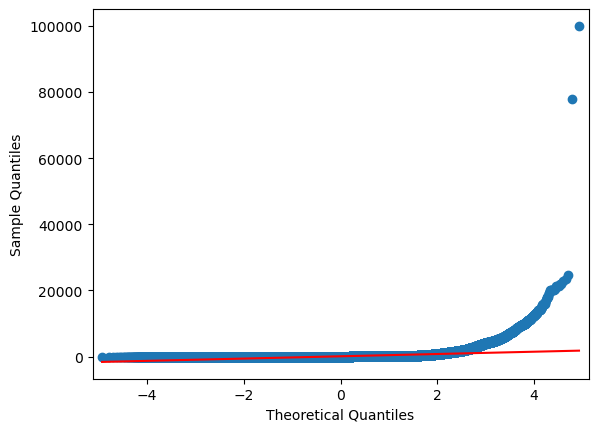

In [103]:
import statsmodels.api as sm
sm.qqplot(df['price'], line='s');
plt.show()

We can see here that the 'price' category may follow a normal distribution in its lower and central areas. Nevertheless, we have previously observed that neither the center nor the lower part of the distribution is normally distributed when outliers are excluded. This flattening occurs because the outliers are included in the plot this time. However, we cannot assert that the price follows a normal distribution.